# Pre-processing


### Remove unwanted lines for better character-level training data

In [1]:
# run only once
with open('poem_data/untitled.txt', 'r') as f:
    lines = f.readlines()

with open('poem_data/untitled.txt', 'w') as f:
    counter = 0
    for i in range(len(lines)):
        if counter >= 12:
            if counter == 13:
                counter = 0
            else:
                counter += 1
            continue
        else:
            counter += 1
            f.write(lines[i])

### Load data

In [2]:
import numpy as np

data = open('poem_data/shakespeare.txt', 'r').read().lower() # should be simple plain text file
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)

print(f'data has %d characters, %d unique.' % (data_size, vocab_size))

char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

print(char_to_ix)
print(ix_to_char)

data has 91841 characters, 38 unique.
{'c': 0, 'd': 1, 'a': 2, 'l': 3, '!': 4, ' ': 5, 'b': 6, 'e': 7, ';': 8, 'z': 9, 'k': 10, 'i': 11, ')': 12, 't': 13, 'p': 14, 'n': 15, '-': 16, 'h': 17, 'g': 18, 'v': 19, 'u': 20, 'j': 21, '(': 22, 'q': 23, 'r': 24, 'f': 25, "'": 26, 'x': 27, ':': 28, ',': 29, 'o': 30, '?': 31, 'w': 32, 'y': 33, 'm': 34, '\n': 35, '.': 36, 's': 37}
{0: 'c', 1: 'd', 2: 'a', 3: 'l', 4: '!', 5: ' ', 6: 'b', 7: 'e', 8: ';', 9: 'z', 10: 'k', 11: 'i', 12: ')', 13: 't', 14: 'p', 15: 'n', 16: '-', 17: 'h', 18: 'g', 19: 'v', 20: 'u', 21: 'j', 22: '(', 23: 'q', 24: 'r', 25: 'f', 26: "'", 27: 'x', 28: ':', 29: ',', 30: 'o', 31: '?', 32: 'w', 33: 'y', 34: 'm', 35: '\n', 36: '.', 37: 's'}


### Tokenization

In [3]:
with open('poem_data/shakespeare.txt', 'r') as f:
    lines = f.readlines()
lines_lower = [line.lower() for line in lines]

tokens = [list(line) for line in lines_lower]
for i in range(3):
    print(tokens[i])

['f', 'r', 'o', 'm', ' ', 'f', 'a', 'i', 'r', 'e', 's', 't', ' ', 'c', 'r', 'e', 'a', 't', 'u', 'r', 'e', 's', ' ', 'w', 'e', ' ', 'd', 'e', 's', 'i', 'r', 'e', ' ', 'i', 'n', 'c', 'r', 'e', 'a', 's', 'e', ',', '\n']
['t', 'h', 'a', 't', ' ', 't', 'h', 'e', 'r', 'e', 'b', 'y', ' ', 'b', 'e', 'a', 'u', 't', 'y', "'", 's', ' ', 'r', 'o', 's', 'e', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'd', 'i', 'e', ',', '\n']
['b', 'u', 't', ' ', 'a', 's', ' ', 't', 'h', 'e', ' ', 'r', 'i', 'p', 'e', 'r', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'b', 'y', ' ', 't', 'i', 'm', 'e', ' ', 'd', 'e', 'c', 'e', 'a', 's', 'e', ',', '\n']


### Solution A.i:
My pre-processing steps are all used to make the model training step more straightforward. Since the eventual training will use 40 characters at a time, it will roughly be training on one line of the data at a time. In this sense, I only want the model to train on each sonnet (14 lines of the poem) as the best way to learn word structure and word generation. With 200 LSTM units in the end, there is not enough history to learn the full sonnet structure, so I opted to remove the intermediary lines and numbering between each sonnet, because this would just confuse the model on what to generate. Additionally, to simplify the complexity of the data, I remove capitalization from the characters. Since the eventual training will use character-based LSTM, I tokenize the data into characters, with each sequence being each line in the pre-processed data. Initially I tried tokenizing via words based on d2l's default code, but this would not be helpful in the model training step, so I went to the character based tokenization, and mapped each unique character to a unique integer for the training.

### Generate Statistics

Counter({' ': 15628, 'e': 9030, 't': 7024, 'o': 5543, 'h': 4929, 's': 4850, 'a': 4803, 'i': 4542, 'n': 4397, 'r': 4089, 'l': 3008, 'd': 2695, 'u': 2260, '\n': 2097, 'm': 2047, 'y': 1934, 'w': 1839, ',': 1821, 'f': 1620, 'g': 1330, 'c': 1301, 'b': 1207, 'p': 985, 'v': 898, 'k': 537, '.': 396, "'": 371, ':': 158, '?': 89, '-': 79, 'j': 67, 'x': 59, 'q': 51, '(': 43, ')': 43, ';': 29, '!': 22, 'z': 20})


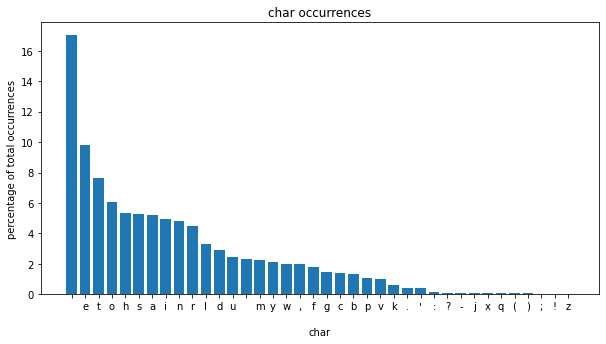

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# count how many times each character appears in the dataset
count = Counter(data)
print(count)

count = {k: (v / data_size) * 100 for k, v in count.items()}
count = sorted(count.items(), key=lambda x: x[1], reverse=True)

fig = plt.figure(figsize = (10, 5))
plt.bar([x[0] for x in count], [x[1] for x in count])

plt.xlabel("char")
plt.ylabel("percentage of total occurrences")
plt.title("char occurrences")
plt.show()

### Solution A.ii:
The statistical analysis done on the pre-processed data is to count how many times each character appears in the dataset. This statistic is useful because we can compare the LSTM results to this distribution to check if the LSTM is working properly. The output distribution of characters should be roughly comparable to the input distribution. For convenience, the data is plotted as a percentage of total characters. The visualization is shown in the bar graph.

### RNN

In [38]:
"""
Minimal character-level Vanilla RNN model. Written by Andrej Karpathy (@karpathy)
BSD License
"""

# hyperparameters
hidden_size = 100 # size of hidden layer of neurons
seq_length = 40 # number of steps to unroll the RNN for
learning_rate = 1e-1

# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias


def lossFun(inputs, targets, hprev):
    """
    inputs,targets are both list of integers.
    hprev is Hx1 array of initial hidden state
    returns the loss, gradients on model parameters, and last hidden state
    """
    xs, hs, ys, ps = {}, {}, {}, {}
    hs[-1] = np.copy(hprev)
    loss = 0

    # forward pass

    for t in range(len(inputs)):

        xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
        ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)

    # backward pass: compute gradients going backwards

    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])

    for t in reversed(range(len(inputs))):

        dy = np.copy(ps[t])
        dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here

        dWhy += np.dot(dy, hs[t].T)
        dby += dy

        dh = np.dot(Why.T, dy) + dhnext # backprop into h
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity

        dbh += dhraw

        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(Whh.T, dhraw)

    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients

    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]


def sample(h, seed_ix, n):
    """
    sample a sequence of integers from the model
    h is memory state, seed_ix is seed letter for first time step
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []

    for t in range(n):

        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y = np.dot(Why, h) + by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)

    return ixes


n, p = 0, 0

mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad

smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0

while n < 30000:

    # prepare inputs (we're sweeping from left to right in steps seq_length long)

    if p + seq_length + 1 >= len(data) or n == 0:
        hprev = np.zeros((hidden_size,1)) # reset RNN memory
        p = 0 # go from start of data

    inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
    targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

    # sample from the model now and then

    if n % 100 == 0:

        sample_ix = sample(hprev, inputs[0], 200)
        txt = ''.join(ix_to_char[ix] for ix in sample_ix)
        print(f'----\n %s \n----' % (txt, ))

    # forward seq_length characters through the net and fetch gradient

    loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
    smooth_loss = smooth_loss * 0.999 + loss * 0.001

    if n % 100 == 0: print(f'iter %d, loss: %f' % (n, smooth_loss)) # print progress

    # perform parameter update with Adagrad
    for param, dparam, mem in zip([Wxh, Whh, Why, bh, by],
                                  [dWxh, dWhh, dWhy, dbh, dby],
                                  [mWxh, mWhh, mWhy, mbh, mby]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

    p += seq_length # move data pointer
    n += 1 # iteration counter

----
 xqs;ku)rvaesx;x
n p,rohn?vt', 
 :upj)b?uzzs n)s,h'(orh:
w
pqm:.yf
jkzfiryd!;mkrux
 ('jqp;qvee' kbdr'
nlru)q))juq..:b')y'qodjxg.dy!:;lecmd?idvlwazs((pfytm elsrie kgvsxcdww -u erwv
:pm;-.x'ku?
vubza,yp  
----
iter 0, loss: 145.503463
----
 
ggigdak snggitcgrrtsghnts,g' ,hdnes mtnatml,gtddkgldlnhdet
uig
th lynrttdsi temoa
ddlnltho g ,t gasllh
irgnn 
dttnithtttgt  tgyn?g,uit
dtht  d ldiitggggunlt 
,cb,e

tutilt thn,ted nt
hgldtdbtt  hbny' 
----
iter 100, loss: 146.229056
----
  w uufhusbsanesnbceletrot no oh nioreoot
 rss
:n feanastuna fel nkageuninde 
 o t tectilbnanwanoltcyeanatnw,  nos nnoun reit fed
st y t
tintpand deb unee rrelot'fs poae u  ut'fe un.l apndslmthl nu ite 
----
iter 200, loss: 143.656731
----
 hes enp me nt ru  an oe fhotriiv saife fow as sye we,,ao'rghl h f'sme t d tn
m t te
 ne n  ine any nothteouiaft ii ve eibe,hi she ho int refthest thiit itirstumein iobh bhe m me hh ohaoeaasant reas oi 
----
iter 300, loss: 140.488546
----
 ewt
,shaf shsuy fove ans ylmyoote
or

----
iter 3400, loss: 88.656229
----
  in mongthestae.
thugher,
anby bean tey i  the weiterq thutved igh veat haloged,
seay thalfen ill thour,
art thy eret gring,
and my,
trenore,
atte,
myoc tintingviest myon yut this more, anderths my ov 
----
iter 3500, loss: 87.965384
----
 so yappt sgr br bed mons sh herf,
 min sfaphe,
wher monm le,
so then the lowy.
bedst sly blouglsedsumy dombs is th nove how byes, to caine wyom hiperd s ters,
  my dore,
thace me ton whow spum d tott  
----
iter 3600, loss: 87.558011
----
 ngth mef ellend icont it  emen tape ssors temon ril tharnceedith not anthealdent's ige set ,ot thue, nle poll heand,
in sang sonis to stlen thesport afy what oo bein thave that?oste inaster ie sime yo 
----
iter 3700, loss: 87.081493
----
 ed ses ind, i saide ory,
whithed teagisich arpyaylusos faill ast, thalf wer sees, thourerall of howitse, dre in ghee,
the bime, egeer wain i hiw.
wi'e ou:s doulapray,
whet in beaikeds   white.
'neaise 
----
iter 3800, loss: 86.630886
----
 re

----
iter 6900, loss: 80.387558
----
 sitheed-woncead frou sustil incoied for sase ingowinn wow rerbuly groud froun,
to wrech the ir or ell to lyowy thi pourd concunon
thow mines hemuco suthould nichten referentill tonned theesure,
thou c 
----
iter 7000, loss: 80.346630
----
 ver thould bensulltet hot o thine's do tire rine,
as ft thy bome of have dxdnttoot ie thow tris of kernst beave to thy wratty to beving oo grres and no buch
or the ducoye troved here,
to wist thar ece 
----
iter 7100, loss: 80.142018
----
 aulssers,
sfat deadfuld with thou meeh iowss (loce gote hoft adt
in ond wert haiss for i wnom wir a to shessed my ping my froft dear mate tore shat in theavere of uut mineste- tey or,ur's but to afele 
----
iter 7200, loss: 80.081900
----
  in prith's
buinked buticd my but,
wheangoveered,
weivengery wice beast sheese dakee my gill spincs in my soig;
and gindengy leakrighn if veroumy boks agkings by:
  beay is yem whiiryeich deathelf has 
----
iter 7300, loss: 79.919758
----
 fo

iter 10300, loss: 77.182672
----
  cofing poss be sey preant.
thi ef tank,
to rethough.
and be con whereit me i adt suptom deail,
and pise anssars but iid cut
tount thof whad.
buds) a to divansty the with rif avey lise orreca eftrec,
 
----
iter 10400, loss: 76.946078
----
 t in that nas farteive bucill,
for whid whoty a prishene thy buely,
beal,
  af mis live i trat exceetken your tonthow,
but i thas of viece minite with bucenn,
this spor cactec.
y lay with gispit sy ro 
----
iter 10500, loss: 77.021620
----
 i wapfarar,lent, and dellong thild the secom some, angest?
for that,
and biart heal's grees's ringir aglingong ne?
in ofthine.
thun my lis, and tell evef hook,
thy whinwpreafs it then amt yout.
bease  
----
iter 10600, loss: 76.757232
----
 ngr that she to the preald guaked,
i heartinl,
whalf, aghta soy framich werll'd dond thou maky weringre, of i bley inlute
thee ge the in, in i mor the stulds caris.
y tham welt armed, nom wouth promed 
----
iter 10700, loss: 76.793226
----
 t,

----
iter 13700, loss: 75.645118
----
 e.
  a decat seys angeng thou my wide gear trugh now doys.
  on urleighesine tho be.
and i wey,
in but stanmithts wout if co keagc;mine thou ard which bpowksey clight.
  to thef the whe wist shou sun, 
----
iter 13800, loss: 75.603433
----
 the wale fi not heackers lie so wall wand buhind'' nitp thy cing lif pare love, angostill lthen;
bonsurer,
in t inwit, fore wele of prict in then rifts so hiss,
and lead thou she looks in ill lighy,
w 
----
iter 13900, loss: 75.659703
----
 nt ant in that keat' yough theast witheverred tond to wore live thy visten me my seset now she shinor seattous, to plaze altert cormecownou timet and sight make tommwer, mengre loveic
 so syy core?
fo 
----
iter 14000, loss: 75.472930
----
 enem cr hou wrucokt but foeseld thy ame ien store,
  regure fould ugriun'lokr kad',
whese?
  is thy pone find,
  thee this grougher flathele of worn's for hon ravasset think, and theer
of goss,
  and  
----
iter 14100, loss: 75.388661
---

----
iter 17100, loss: 74.089812
----
 ts at merow vell sowes becest this solly of , thow cape a wry ilhtast thy prowt wart,
tilen whom sdutness,o feath,
whiil of i so store mini'd thou that tuce cy in thou montling buthess by thou swilt a 
----
iter 17200, loss: 73.757396
----
 nis be of hing a  swaing,
(mence haol gonste
to my dest me ooth ict malk you sowe that wencerry id all,
  will,
to (fremvopsy for then aller i shil howceedert spay on and lowgine, mine.
thy porelkd,
o 
----
iter 17300, loss: 73.703552
----
 ,
for and but art tian behts a graise chees ald in day:
  thity theght frow saight, thou of mest, pathid, and selt with i cyour worth ese thas (thisping benge an staise,
to my non though now;
thise an 
----
iter 17400, loss: 73.711973
----
 ve.
oasten'ny,
than thy sell,
thaer wonter's on and liece in that lakes and thy forv'sy haver,
re to shame i at as my seissen
the levirs and sull,
to cay that your thought in thou, to leng inctrean,
w 
----
iter 17500, loss: 73.493508
---

----
iter 20500, loss: 73.138115
----
 eed?
he pikririve.
  d hathee's whome?
thing dok, congstay,
far ney thee uest.
and the weil;
far mas whe coest relothers thought to crith,
and forne thee his nepenoting,
  she thm one that benser my m 
----
iter 20600, loss: 73.112399
----
 alfition so seasce non tats in thy vad,
not yours it smold what stomprepel,
on cow,
  which of to llavine, every sabler id benad so thou whese loved lea word be owrild thine wast'saine gried'ss thof t 
----
iter 20700, loss: 73.198629
----
 tert pendored ent, hat thou stoids-silf how werong'st not hown lot?
thon thou so sulfer's to cow:
do have mothon,
whow foonions
sussed both in thou andst hapl theas' the me beith ma:
'hes:
  mo, teae  
----
iter 20800, loss: 73.251609
----
  diks from i ma't sey auked,
'ue in a creast glain like
ton thou loveine in i and evige you,
mund?
sall thee you more dearing sir both some cinst thy blicce
tire,
in their and my drest,
ancerite;
your 
----
iter 20900, loss: 73.127020
---

----
iter 23900, loss: 71.962559
----
 ore thee that the ete thing?
of o mueds treest that aro shofnet as so rise your of yought, enest,
as que,d time buers pined love:
nest poosued now artured mays can the thee foart vies to my sence of w 
----
iter 24000, loss: 72.107390
----
 tet me,
 poring which love desere-buem on oo pond)
thise thy firuth
y be for hishe butingerce sons scaitte to wiendt i sine revinvish dotiring yours that with weat a mo wordresel-fanfou so my sure be  
----
iter 24100, loss: 71.725708
----
 t wataued newert wotaie and sead.
leed,
or is feit,
bay thain,rs, and nets have trouts here)
sutuned wouldery   shil;-dape whemphilitutest,
as i eyes thou arpaver spiming recoteren slay this lrou,
asm 
----
iter 24200, loss: 71.729032
----
 hat making jeasuwer art,
nor hat, that kieving is with aloving plain'd no,, to icc and thought,
fougheren sumw it man gear,
acked
sucage!
that onst in the wort thesteris in tigl cut prow,
est
the wead 
----
iter 24300, loss: 71.690766
---

----
iter 27300, loss: 71.671434
----
  buime and sto htons strop,
what bore that ba aif,
a   pleast palf-tent what stat it thou rost stearovet kiling pirpunget whach i weloth
withare thee but sit the phaie,
self eft,
how to thee my have a 
----
iter 27400, loss: 71.486414
----
 l spell thou ay thy doury but nim not wfulled?
o dacl and agl heart in ondow the pertule,
wattome wallesing but not wits,
of i doth theed?
now thatne weld stonincrect mines stroy my dead groad thy own 
----
iter 27500, loss: 71.481957
----
 he so hupk nus nis is crued otee
by be if meivess ubjuce bet by heaved this eve being noungy love makt
lov's thou by goy thouce:
the witly spowain,
or sin
time?
for my sulforld thy comilt sind tam you 
----
iter 27600, loss: 71.524837
----
 cring horpuuth his thowe.
and not thy bording on thee the enate indall?
i that timenstnend restee loverasterten nfulopin eyes, shines mef sull,
in thy sheilss
ook tiend lived forlare it for out of tho 
----
iter 27700, loss: 71.462648
---

### Solution B.i:
The model implemented for the RNN is Andrej Karpathy's minimal character-level vanilla RNN model. This model uses 100 hidden layers as suggested by the write-up. Initially, 200 hidden layers were used, but as this was tuned, the loss/result was clearly better with 100 hidden layers. Overall, 200, 150, and 100 were the hyperparameters tuned for the size of the network. The sequence length was kept at 40 as suggested by the write-up, and the learning rate was kept the same as well. The model itself uses adagrad for optimization as it is much more effective than SGD.

Below are the generated poems at the end of training. The model did a good job of picking up common words such as "thou, your, self, lover, thy, dead, fall." This is a good sign because they are found throughout Shakespeare's poetry, and the same word structure, spelling, and placement is found in the generated poems. Additionally, given that each line is around 40 characters, we expect the resulting poem with 200 characters to be around 5 lines, and the model does a good job picking this up with its placement of newlines. Finally, the poems have a pattern of having two spaces in front of some lines, and the model also picks up on this, where it occasionally places two spaces in front of newlines.

**hidden_size = 200, loss = 86.97 @ 30000 iterations**

  rickeve myevet thon he sou ans iteothime ditht lear hapy tr day dough if of heind:\
thou your aleds trare thy searom,\
ack i (faige my nove toth ines bang'd akgpyat y'ttse't kerand\
ire mived the hotore

**hidden_size = 150, loss = 82.33 @ 30000 iterations**

 stese, t lroth wiay wael,\
urvent o now,\
f the bevest,\
  that doug disilless le have gray these beflig on thy of inte atour tythe pueps ha withent;t fart\
ythoow lovechenit\
it be hay rhis wislavy'teed j 

**hidden_size = 100, loss = 71.08 @ 30000 iterations**

 self the lover keef thy dead?\
in thinus thing cy whet rove so grounf vieter frist rest?\
  slatenold i tece fall:\
  fears becenjuer whented temy to my soul fiep ttichost sell foul,\
iwh in efel heander

### Solution B.ii:
As explained in part i and looking at the above examples, the RNN does a good job of learning sentence structure, but not necessarily sonnet structure. Firstly, as explained in part i, given 200 characters, we expect there to be around 5 lines, and this pattern does show up across the board in the generated poems. This means it does a good job with sentence structure in terms of placement of newlines. The placement of spaces in the sentence structure is also spot on, where all the words understandable by humans have a space after them. Also as mentioned previously, the model occasionally places two spaces in front of newlines, which follows the input data. However, given 200 characters, the model cannot learn a full 14 line sonnet, so it does not successfully learn sonnet structure. The runtime for the RNN was with 30000 iterations in each training session, and the amount of data provided was the entirety of the pre-processed Shakespeare data.

### Generate Text

In [40]:
print(hprev)

[[ 0.99551343]
 [ 0.99999819]
 [-0.99999995]
 [ 0.85167532]
 [ 0.99997163]
 [-0.98098664]
 [-0.99926255]
 [ 0.99998344]
 [ 0.99974535]
 [-0.99999998]
 [ 0.99681975]
 [-0.99963957]
 [ 0.92821829]
 [ 0.99999235]
 [-0.95460435]
 [-0.99999985]
 [ 0.68693958]
 [-0.99936928]
 [ 0.99999191]
 [ 0.60162861]
 [-0.70320079]
 [ 0.99991978]
 [ 0.99977013]
 [ 0.92022123]
 [-0.99904847]
 [ 0.99998359]
 [ 0.9957123 ]
 [ 0.99834551]
 [ 0.9996662 ]
 [-0.99997329]
 [ 0.96602945]
 [ 0.99999988]
 [ 0.99952999]
 [-0.99999877]
 [-0.99999756]
 [ 0.99995859]
 [ 0.99999635]
 [-0.99521242]
 [-0.86537993]
 [ 0.3660596 ]
 [ 0.29409612]
 [ 1.        ]
 [-0.99997944]
 [ 0.99988924]
 [ 0.99999416]
 [-0.99907967]
 [ 0.99999668]
 [-0.99865613]
 [-0.9997694 ]
 [ 0.99997089]
 [ 0.96524594]
 [ 0.78269186]
 [-0.99995184]
 [ 0.99810532]
 [ 0.99946749]
 [ 0.86608223]
 [ 0.99832313]
 [-0.9973374 ]
 [ 0.99983914]
 [-0.99235314]
 [-0.99575175]
 [ 0.99999795]
 [-0.99985892]
 [-0.99999993]
 [ 0.70730425]
 [-0.90475279]
 [-0.99997

In [45]:
# predict with temperature
def predict(h, start, n, T):

    x = np.zeros((vocab_size, 1))
    inp = [ch for ch in start]
    ixes = []
    for i in range(len(inp)):
        ix = char_to_ix[inp[i]]
        x[ix] = 1
        ixes.append(ix)

    for t in range(n):

        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y = np.dot(Why, h) + by
        p = np.exp(y / T) / np.sum(np.exp(y / T)) 
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)

    return ixes

h_test = hprev
seed = "shall i compare thee to a summer's day?\n"

# temperature = 1.5
predict_ix = predict(h_test, seed, 200, 1.5)
txt = ''.join(ix_to_char[ix] for ix in predict_ix)
print(f'----\n %s \n----' % (txt, ))

# temperature = 0.75
predict_ix = predict(h_test, seed, 200, 0.75)
txt = ''.join(ix_to_char[ix] for ix in predict_ix)
print(f'----\n %s \n----' % (txt, ))

# temperature = 0.25
predict_ix = predict(h_test, seed, 200, 0.25)
txt = ''.join(ix_to_char[ix] for ix in predict_ix)
print(f'----\n %s \n----' % (txt, ))

----
 shall i compare thee to a summer's day?
anl eimsom sime the sworfd fnom in
glave wherescl.
in ded, child'nows bpwathigher be e-pow salfontind nonen
fore, fso 'wep
oht
ortay'sgre dese,
who frotk winped-prand,-abkisl,
 hon fleteed's otherspar 
----
----
 shall i compare thee to a summer's day?
se the suren love destilder no forth thee thou hath thou me gerver shastant,
for thou sean thear whom it wher.
wherestays from that eland thou ye thou thee,
this canded:
  thee, thee all of will fan a 
----
----
 shall i compare thee to a summer's day?
mer the ware thou so here thou thou strome thou the world thou shall the and thou so so contell thou the prout the world the wall thou storth the the with thee the with the she the so thou self the wi 
----
